In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Matplotlib is building the font cache; this may take a moment.


In [3]:
df = pd.read_csv("jobs.csv")

In [183]:
df.head(2)

,Unnamed:_0,Job_Title,Salary_Estimate,Job_Description,Rating,Company_Name,Location,Headquarters,Size,Founded,...,Easy_Apply,Min_salary_USD_k,Max_salary_USD_k,City,State,Avg_salary_USD_k,Rating_Range,Salary Lower bound,Salary Upper bound,None
0,0,"Data Analyst, Center on Immigration and Justice (CIJ)",$37-$66,Are you eager to roll up your sleeves and harness data to drive policy change? Do you enjoy sift...,3.2,Vera Institute of Justice,New York,"New York, NY",201 to 500 employees,1961.0,...,True,37.0,66,New York,NY,51.5,Medium Rated,37.0,66.0,None
1,1,Quality Data Analyst,$37-$66,Overview\n\nProvides analytical and technical support for the integration of multiple data sourc...,3.8,Visiting Nurse Service of New York,New York,"New York, NY",10000+ employees,1893.0,...,False,37.0,66,New York,NY,51.5,Medium Rated,37.0,66.0,None


In [8]:
df.shape      #### gives the no. of rows and columns in the dataset

(2253, 16)

In [9]:
df.describe()

,Unnamed: 0,Rating,Founded
count,2253.0000,2253.000000,2253.000000
mean,1126.0000,3.160630,1398.522858
std,650.5294,1.665228,901.929251
min,0.0000,-1.000000,-1.000000
25%,563.0000,3.100000,-1.000000
50%,1126.0000,3.600000,1979.000000
75%,1689.0000,4.000000,2002.000000
max,2252.0000,5.000000,2019.000000


In [10]:
df.columns = df.columns.str.replace(" ", "_")
df.head()

,Unnamed:_0,Job_Title,Salary_Estimate,Job_Description,Rating,Company_Name,Location,Headquarters,Size,Founded,Type_of_ownership,Industry,Sector,Revenue,Competitors,Easy_Apply
0,0,"Data Analyst, Center on Immigration and Justic...",$37K-$66K (Glassdoor est.),Are you eager to roll up your sleeves and harn...,3.2,Vera Institute of Justice\n3.2,"New York, NY","New York, NY",201 to 500 employees,1961,Nonprofit Organization,Social Assistance,Non-Profit,$100 to $500 million (USD),-1,True
1,1,Quality Data Analyst,$37K-$66K (Glassdoor est.),Overview\n\nProvides analytical and technical ...,3.8,Visiting Nurse Service of New York\n3.8,"New York, NY","New York, NY",10000+ employees,1893,Nonprofit Organization,Health Care Services & Hospitals,Health Care,$2 to $5 billion (USD),-1,-1
2,2,"Senior Data Analyst, Insights & Analytics Team...",$37K-$66K (Glassdoor est.),We’re looking for a Senior Data Analyst who ha...,3.4,Squarespace\n3.4,"New York, NY","New York, NY",1001 to 5000 employees,2003,Company - Private,Internet,Information Technology,Unknown / Non-Applicable,GoDaddy,-1
3,3,Data Analyst,$37K-$66K (Glassdoor est.),Requisition NumberRR-0001939\nRemote:Yes\nWe c...,4.1,Celerity\n4.1,"New York, NY","McLean, VA",201 to 500 employees,2002,Subsidiary or Business Segment,IT Services,Information Technology,$50 to $100 million (USD),-1,-1
4,4,Reporting Data Analyst,$37K-$66K (Glassdoor est.),ABOUT FANDUEL GROUP\n\nFanDuel Group is a worl...,3.9,FanDuel\n3.9,"New York, NY","New York, NY",501 to 1000 employees,2009,Company - Private,Sports & Recreation,"Arts, Entertainment & Recreation",$100 to $500 million (USD),DraftKings,True


In [12]:
df.Job_Title.value_counts().head()

Data Analyst             405
Senior Data Analyst       90
Junior Data Analyst       30
Business Data Analyst     28
Sr. Data Analyst          21
Name: Job_Title, dtype: int64

In [15]:
df.Job_Title.replace({"Sr. Data Analyst":"Senior Data Analyst", "Sr Data Analyst":"Senior Data Analyst" , 
                           "DATA ANALYST": "Data Analyst" , "Data analyst": "Data Analyst" , 
                           "Jr Data Analyst":"Junior Data Analyst"} , inplace = True)

In [17]:
df.Salary_Estimate.value_counts().head()

$41K-$78K (Glassdoor est.)    57
$42K-$76K (Glassdoor est.)    57
$50K-$86K (Glassdoor est.)    41
$35K-$67K (Glassdoor est.)    33
$58K-$93K (Glassdoor est.)    31
Name: Salary_Estimate, dtype: int64

In [20]:
sal_samp = df.Salary_Estimate.str.split("-" , expand = True)
df["Min_salary_USD_k"] = pd.to_numeric(sal_samp[0].str.extract('(\d+)' , expand = False))
df["Max_salary_USD_k"] = pd.to_numeric(sal_samp[1].str.extract('(\d+)' , expand = False))

In [21]:
df.loc[: , ["Min_salary_USD_k","Max_salary_USD_k"]].head(5)

,Min_salary_USD_k,Max_salary_USD_k
0,37.0,66
1,37.0,66
2,37.0,66
3,37.0,66
4,37.0,66


In [22]:
df.Company_Name.head()


0             Vera Institute of Justice\n3.2
1    Visiting Nurse Service of New York\n3.8
2                           Squarespace\n3.4
3                              Celerity\n4.1
4                               FanDuel\n3.9
Name: Company_Name, dtype: object

In [24]:
split1 = df.Company_Name.str.split("\n",expand = True)
df["Company_Name"] = split1[0]
df.head()

,Unnamed:_0,Job_Title,Salary_Estimate,Job_Description,Rating,Company_Name,Location,Headquarters,Size,Founded,Type_of_ownership,Industry,Sector,Revenue,Competitors,Easy_Apply,Min_salary_USD_k,Max_salary_USD_k
0,0,"Data Analyst, Center on Immigration and Justic...",$37K-$66K (Glassdoor est.),Are you eager to roll up your sleeves and harn...,3.2,Vera Institute of Justice,"New York, NY","New York, NY",201 to 500 employees,1961,Nonprofit Organization,Social Assistance,Non-Profit,$100 to $500 million (USD),-1,True,37.0,66
1,1,Quality Data Analyst,$37K-$66K (Glassdoor est.),Overview\n\nProvides analytical and technical ...,3.8,Visiting Nurse Service of New York,"New York, NY","New York, NY",10000+ employees,1893,Nonprofit Organization,Health Care Services & Hospitals,Health Care,$2 to $5 billion (USD),-1,-1,37.0,66
2,2,"Senior Data Analyst, Insights & Analytics Team...",$37K-$66K (Glassdoor est.),We’re looking for a Senior Data Analyst who ha...,3.4,Squarespace,"New York, NY","New York, NY",1001 to 5000 employees,2003,Company - Private,Internet,Information Technology,Unknown / Non-Applicable,GoDaddy,-1,37.0,66
3,3,Data Analyst,$37K-$66K (Glassdoor est.),Requisition NumberRR-0001939\nRemote:Yes\nWe c...,4.1,Celerity,"New York, NY","McLean, VA",201 to 500 employees,2002,Subsidiary or Business Segment,IT Services,Information Technology,$50 to $100 million (USD),-1,-1,37.0,66
4,4,Reporting Data Analyst,$37K-$66K (Glassdoor est.),ABOUT FANDUEL GROUP\n\nFanDuel Group is a worl...,3.9,FanDuel,"New York, NY","New York, NY",501 to 1000 employees,2009,Company - Private,Sports & Recreation,"Arts, Entertainment & Recreation",$100 to $500 million (USD),DraftKings,True,37.0,66


In [25]:
split2 = df.Location.str.split("," , expand = True)
df["City"] = split2[0]
df["State"] = split2[1]

In [26]:
df.State.value_counts()


 CA          626
 TX          394
 NY          345
 IL          164
 PA          114
 AZ           97
 NC           90
 CO           88
 NJ           86
 WA           54
 VA           48
 OH           35
 UT           33
 FL           27
 IN           23
 DE           11
 Arapahoe      8
 GA            4
 KS            3
 SC            3
Name: State, dtype: int64

# Arapahoe is a county in CO, so change it to CO


In [27]:
df.loc[df.State.str.contains("Arapahoe") , "State"] = "CO"


In [29]:
df.State = df.State.str.strip()

In [32]:
df.Size.value_counts()

51 to 200 employees        421
10000+ employees           375
1001 to 5000 employees     348
1 to 50 employees          347
201 to 500 employees       249
501 to 1000 employees      211
-1                         163
5001 to 10000 employees     97
Unknown                     42
Name: Size, dtype: int64

In [33]:
df.Revenue.value_counts()

Unknown / Non-Applicable            615
$100 to $500 million (USD)          218
$50 to $100 million (USD)           199
$10+ billion (USD)                  189
-1                                  163
$10 to $25 million (USD)            132
$2 to $5 billion (USD)              129
$1 to $5 million (USD)              111
$25 to $50 million (USD)            110
Less than $1 million (USD)           93
$1 to $2 billion (USD)               87
$500 million to $1 billion (USD)     79
$5 to $10 million (USD)              72
$5 to $10 billion (USD)              56
Name: Revenue, dtype: int64

In [34]:
df.Industry.value_counts().head()

-1                                  353
IT Services                         325
Staffing & Outsourcing              323
Health Care Services & Hospitals    151
Computer Hardware & Software        111
Name: Industry, dtype: int64

In [35]:
df.Easy_Apply.value_counts()


-1      2173
True      80
Name: Easy_Apply, dtype: int64

In [182]:
df.Competitors.value_counts().head()

AttributeError: 'DataFrame' object has no attribute 'Competitors'

In [181]:
df.drop(columns = "Competitors" , inplace = True)
df.head()

KeyError: "['Competitors'] not found in axis"

In [38]:
len(df.loc[(df[df.columns] == -1).any(1)])


680

In [39]:
df.replace(-1, np.nan , inplace = True)
df.replace("-1" , np.nan , inplace = True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2253 entries, 0 to 2252
Data columns (total 19 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed:_0         2253 non-null   int64  
 1   Job_Title          2253 non-null   object 
 2   Salary_Estimate    2252 non-null   object 
 3   Job_Description    2253 non-null   object 
 4   Rating             1981 non-null   float64
 5   Company_Name       2252 non-null   object 
 6   Location           2253 non-null   object 
 7   Headquarters       2081 non-null   object 
 8   Size               2090 non-null   object 
 9   Founded            1593 non-null   float64
 10  Type_of_ownership  2090 non-null   object 
 11  Industry           1900 non-null   object 
 12  Sector             1900 non-null   object 
 13  Revenue            2090 non-null   object 
 14  Easy_Apply         80 non-null     object 
 15  Min_salary_USD_k   2252 non-null   float64
 16  Max_salary_USD_k   2253 

In [40]:
def Missing_Values_dataframe(df):
        null_val = df.isnull().sum(0)
        
        null_val_percent = 100 * df.isnull().sum(0) / len(df)
        
        null_val_df = pd.concat([null_val, null_val_percent], axis=1)
        
        null_val_df = null_val_df.rename(mapper = {0 : "Missing Values", 1 : '% of Missing Values'} , axis = "columns")
        
        null_val_df = null_val_df.sort_values(by = "% of Missing Values" , ascending = False ).round(2)
        
        return null_val_df

In [41]:
Missing_Values_dataframe(df)


,Missing Values,% of Missing Values
Easy_Apply,2173,96.45
Founded,660,29.29
Industry,353,15.67
Sector,353,15.67
Rating,272,12.07
Headquarters,172,7.63
Size,163,7.23
Type_of_ownership,163,7.23
Revenue,163,7.23
Salary_Estimate,1,0.04


# Remove missing values

In [42]:
df["Easy_Apply"] = df.Easy_Apply.fillna(value = False)


In [43]:
df["Avg_salary_USD_k"] = (df["Max_salary_USD_k"] + df["Min_salary_USD_k"]) / 2  #### New column formed to analyse high rated companies


In [73]:
df["Rating_Range"] = pd.cut(df.Rating , bins= [0 , 2.75 , 4.2 ,5] , 
                                 labels = ["Low Rated" , "Medium Rated" , "High Rated"])

In [74]:
df_sorted_desc= df.sort_values('Rating',ascending=False)

# States with the highest rates companies

Text(0.5, 1.0, 'Rating of Companies VS State')

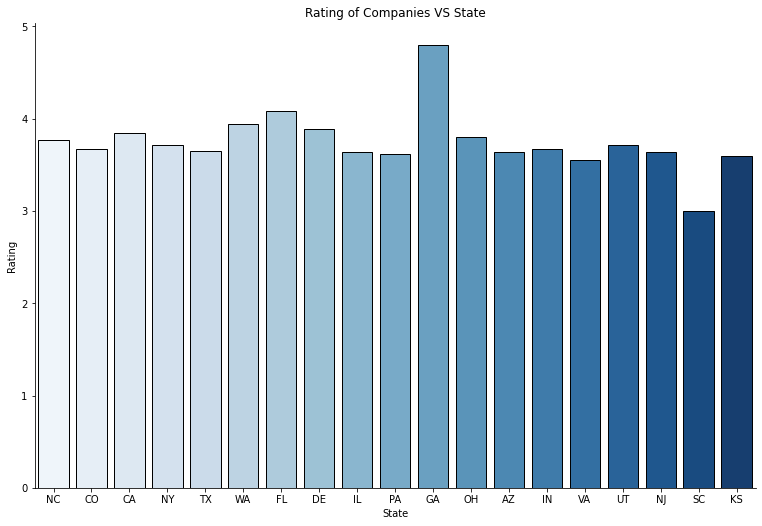

In [184]:
sns.catplot(kind = "bar" ,x = "State", y = "Rating"  , data = df_sorted_desc , height = 7 , aspect = 1.5, ci= None, palette="Blues", edgecolor="black")
plt.title("Rating of Companies VS State")